In [1082]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
import PIL
from PIL import Image
import time
# from google.colab.patches import cv2_imshow

In [1083]:
def images_list(good_image_path, bad_image_path):
    paths_good = sorted(os.listdir(good_image_path))
    paths_bad = sorted(os.listdir(bad_image_path))
    good_images = []
    bad_images = []
    print(paths_good)
    print(paths_bad)
    for imagename in paths_good:
        if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
            continue
        else:
            good_images.append(cv2.imread(os.path.join(good_image_path,imagename)))

    for imagename in paths_bad:
        if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
            continue
        else:
            bad_images.append(cv2.imread(os.path.join(bad_image_path,imagename)))
 
    # returns both image dictionary
    return good_images, bad_images

In [1084]:
good_image_path = 'C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good' 
bad_image_path = 'C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad' 
print(good_image_path, bad_image_path)
good_images, bad_images = images_list(good_image_path, bad_image_path)

C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad
['1.png', '2.png', '3.png']
['1.png', '2.png', '3.bmp']


In [4]:
#### Image Visualization

In [1085]:
# image visualization
def image_visualization(fig_title, image_list, row, column, image_count):
  row = row
  col = column
  fig = plt.figure(figsize = (30,8))
  fig.suptitle(fig_title, fontsize = 24)
  for i,image in enumerate(image_list):
    #print(image_dir[imagename].shape)
    fig.add_subplot(row, col, i+1)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
  plt.show()


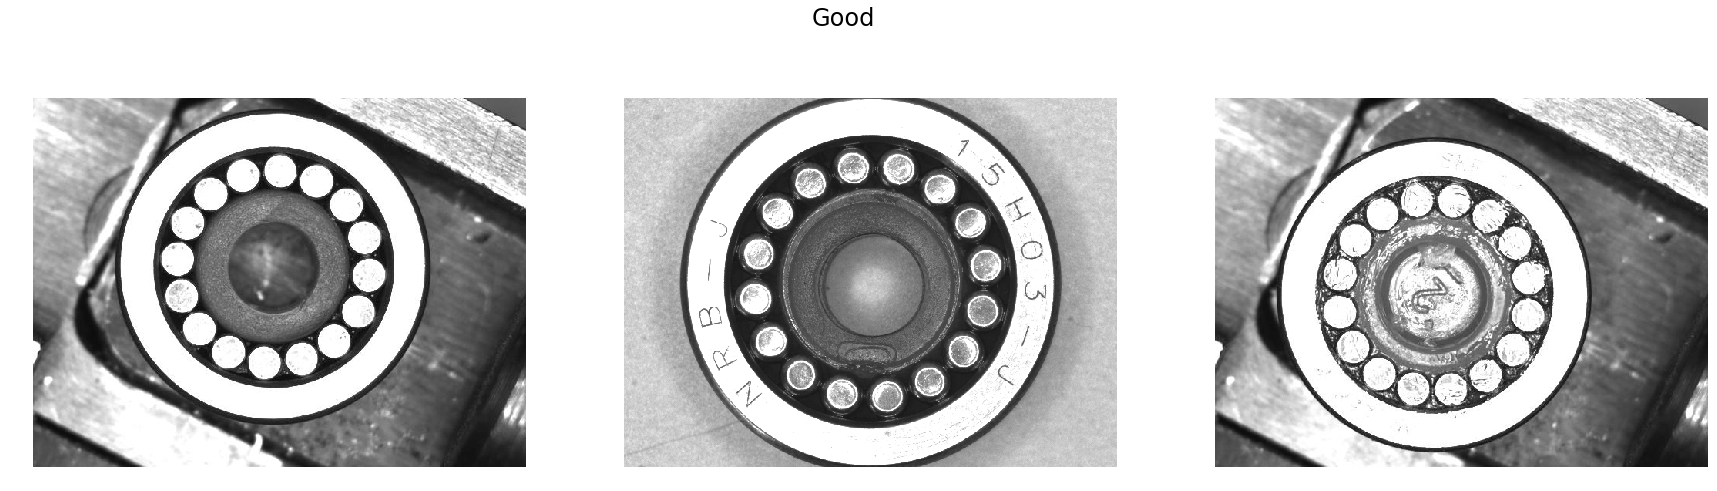

In [6]:
# good image visualization
fig_title = 'Good'
image_list = good_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_list, row, column, image_count)

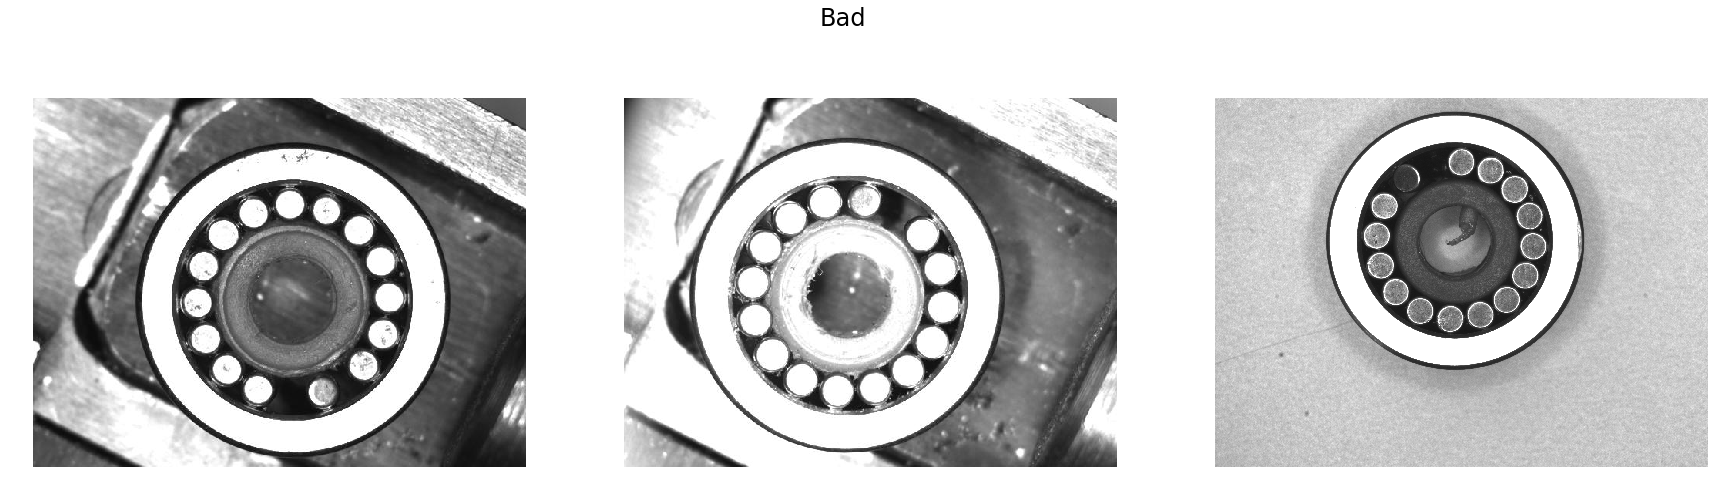

In [1086]:
# bad image visualization
fig_title = 'Bad'
image_dict = bad_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

In [1074]:
#### Circle detection using hugh circles
## link: https://stackoverflow.com/questions/59014406/circle-detection-in-noisy-a-image
## According to this changes param2 to 15
# but at param2
# aspect ratio being constant while resizing the image
# optimal width is choosen = 600
# All are working properly

In [1119]:
img = Image.open('C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good/2.png')
mywidth = 600
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg')

In [1120]:
#img = bad_images[1]
#img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img.astype('uint8')
#img = cv2.resize()
print(img.shape)

(450, 600)


Circle count: 16


"\ncv2.imshow('Circles',cimg)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

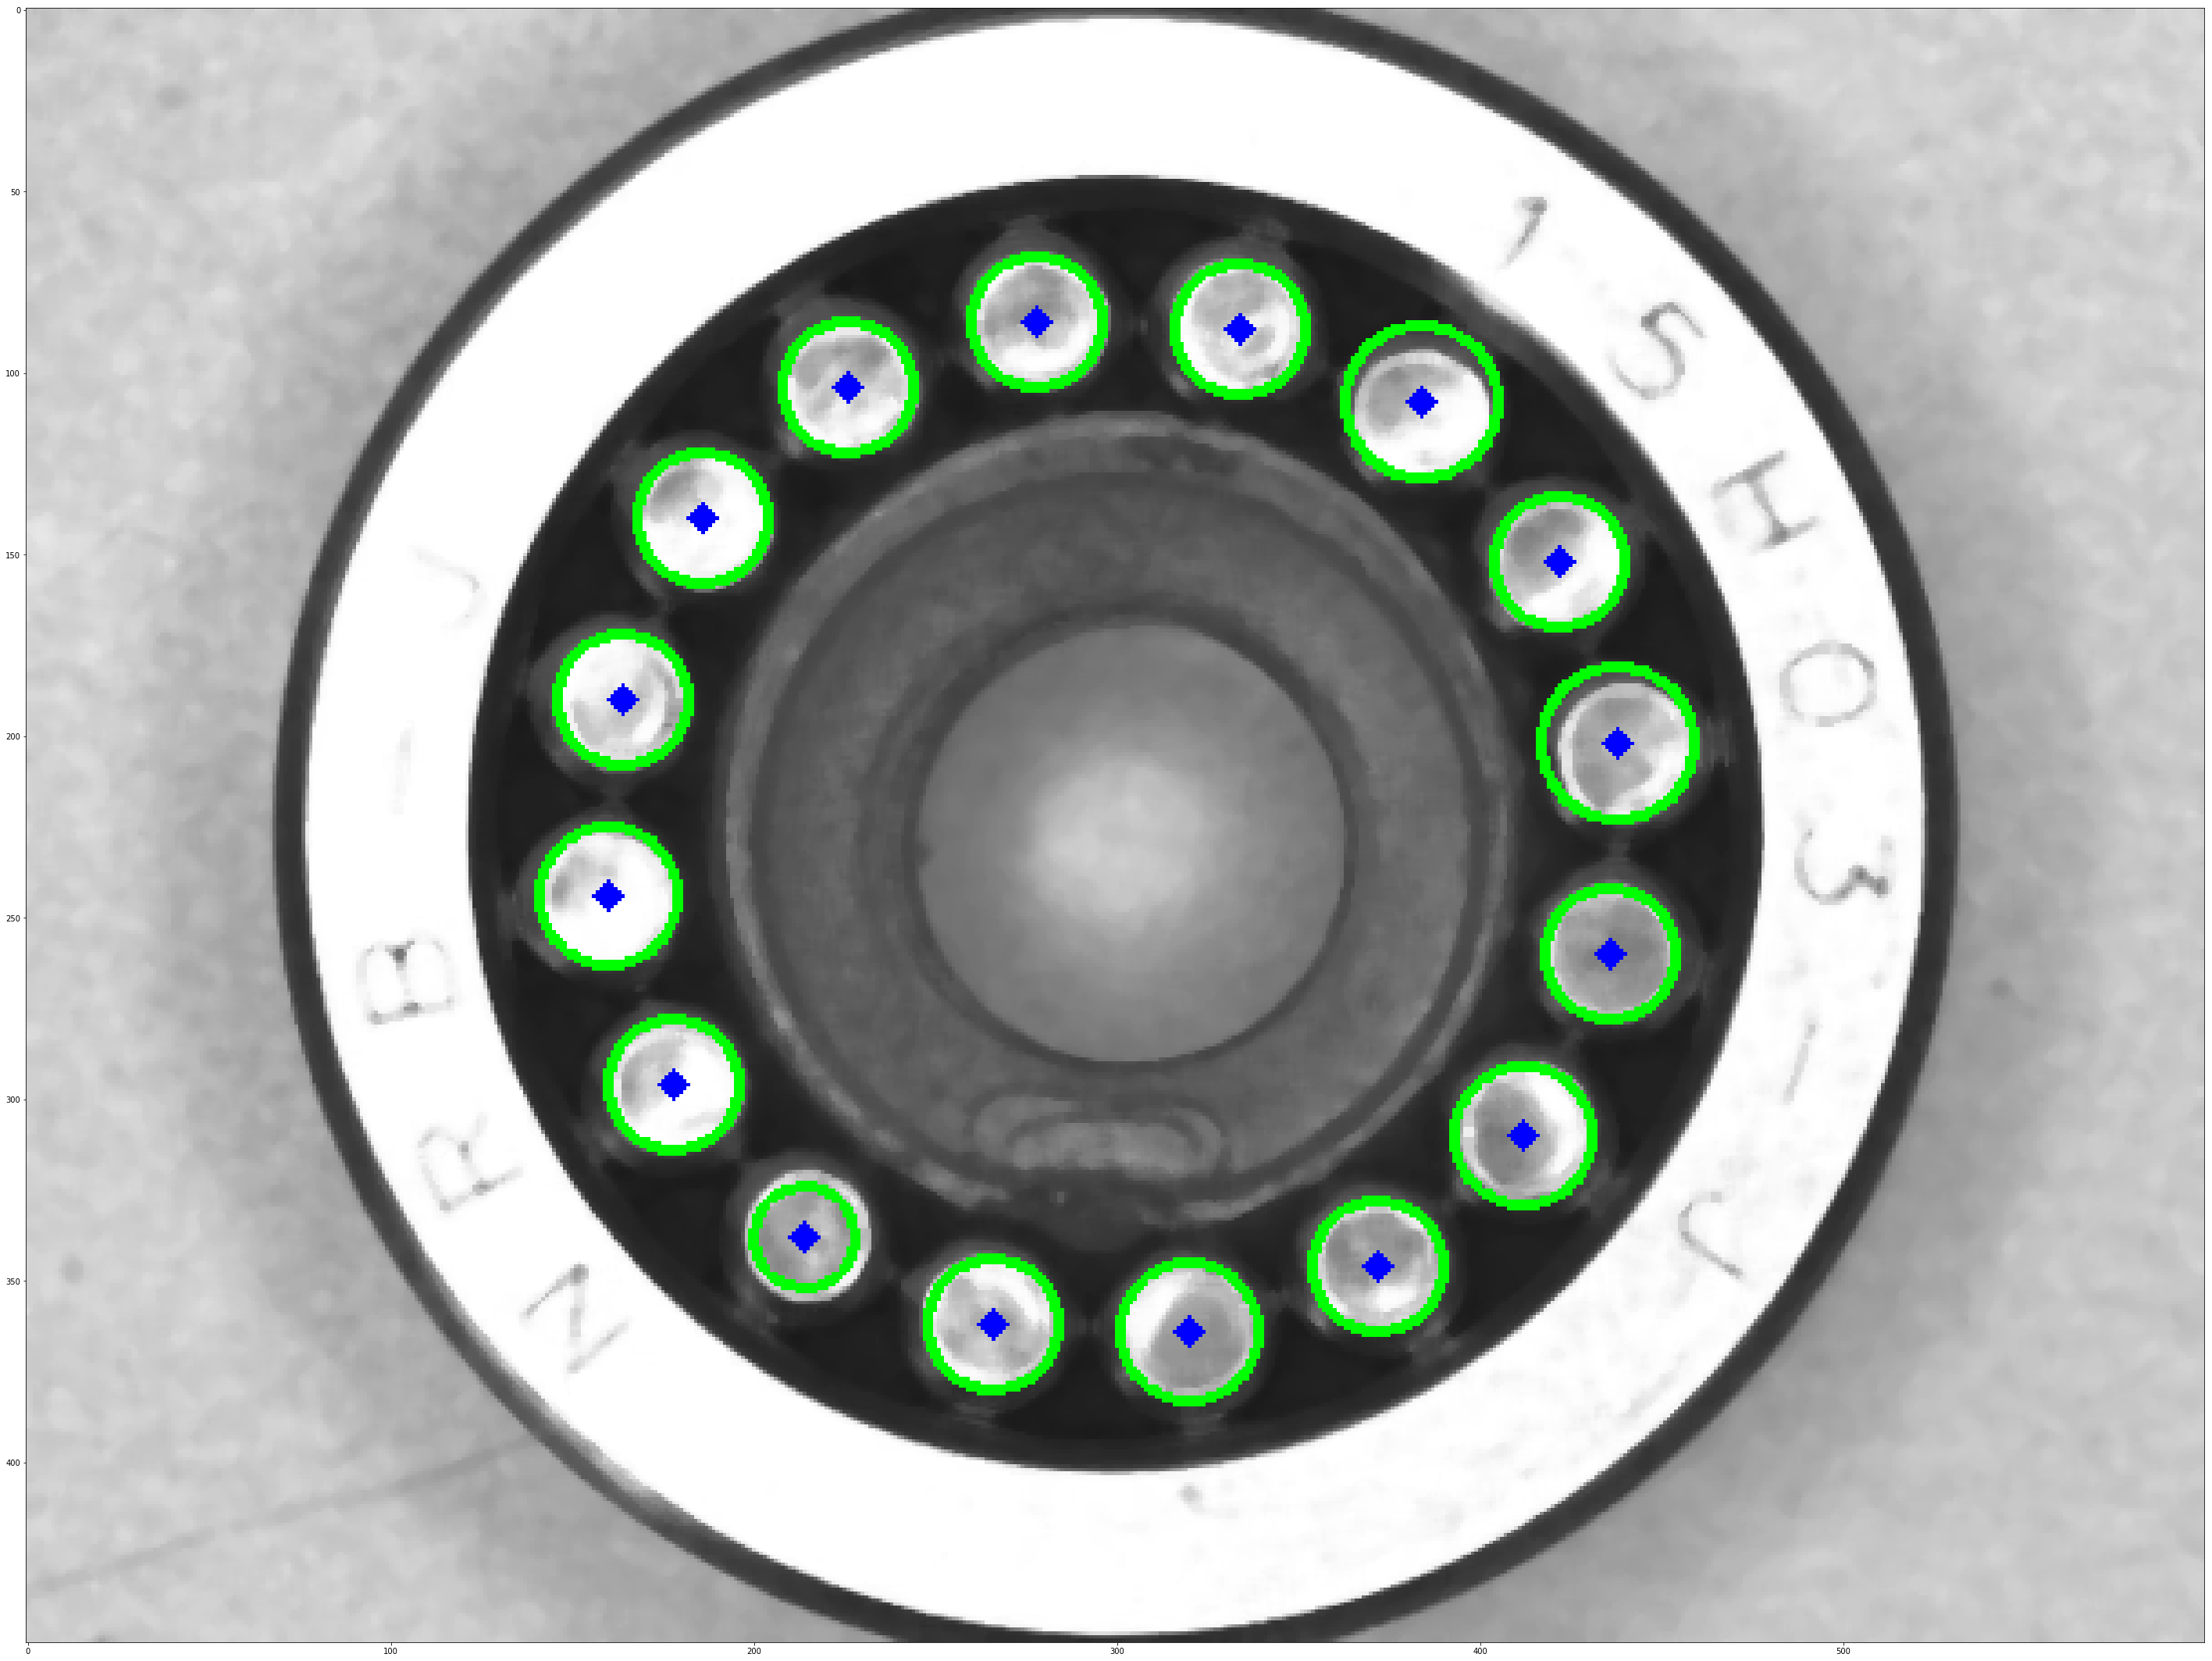

In [1121]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#edges = cv2.Canny(img,20,80,apertureSize = 3)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1= 110,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
print(f'Circle count: {len(circles[0,:])}')
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig = plt.figure(figsize=(50,50))
plt.imshow(cimg)
'''
cv2.imshow('Circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

In [1095]:
print(f'Circle count: {len(circles[0,:])}')

Circle count: 14


In [427]:
#### Note: Hough Circle detection is not working good
## Trying improved hough transform
## link: https://answers.opencv.org/question/192706/hough-circles-way-too-sensitive/

In [972]:
img = Image.open('C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad/3.bmp')
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg')
print(img.shape)

(375, 500, 3)


In [973]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img.astype('uint8')
#img = cv2.resize()
print(img.shape)

(375, 500)


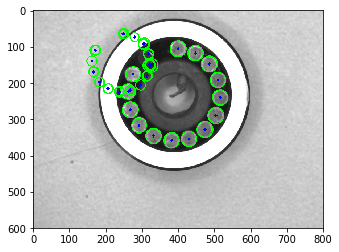

In [974]:
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#bin=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#invbin=cv2.bitwise_not(bin)
#img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
img = cv2.medianBlur(img,5)
#edges = cv2.Canny(img,20,100,apertureSize = 3)
#plt.imshow(edges)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,50,param1=200,param2=30,minRadius=5,maxRadius=25)

#cv2.imshow('edge',edges)
#cv2.waitKey(0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [475]:
#### Modification 2
# not working
# we tested some sample images 
# not working: 2,3

In [900]:
img = Image.open('C:/Users/Sayan Hazra/Desktop/Bearings/Test/7.jpg')
mywidth = 400
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg',0)
print(img.shape)

(400, 400)


Time taken for execution 0.07001876831054688


"\ncv2.imshow('detected circles', cimg)\ncv2.waitKey(0)\n\ncv2.destroyAllWindows()\n"

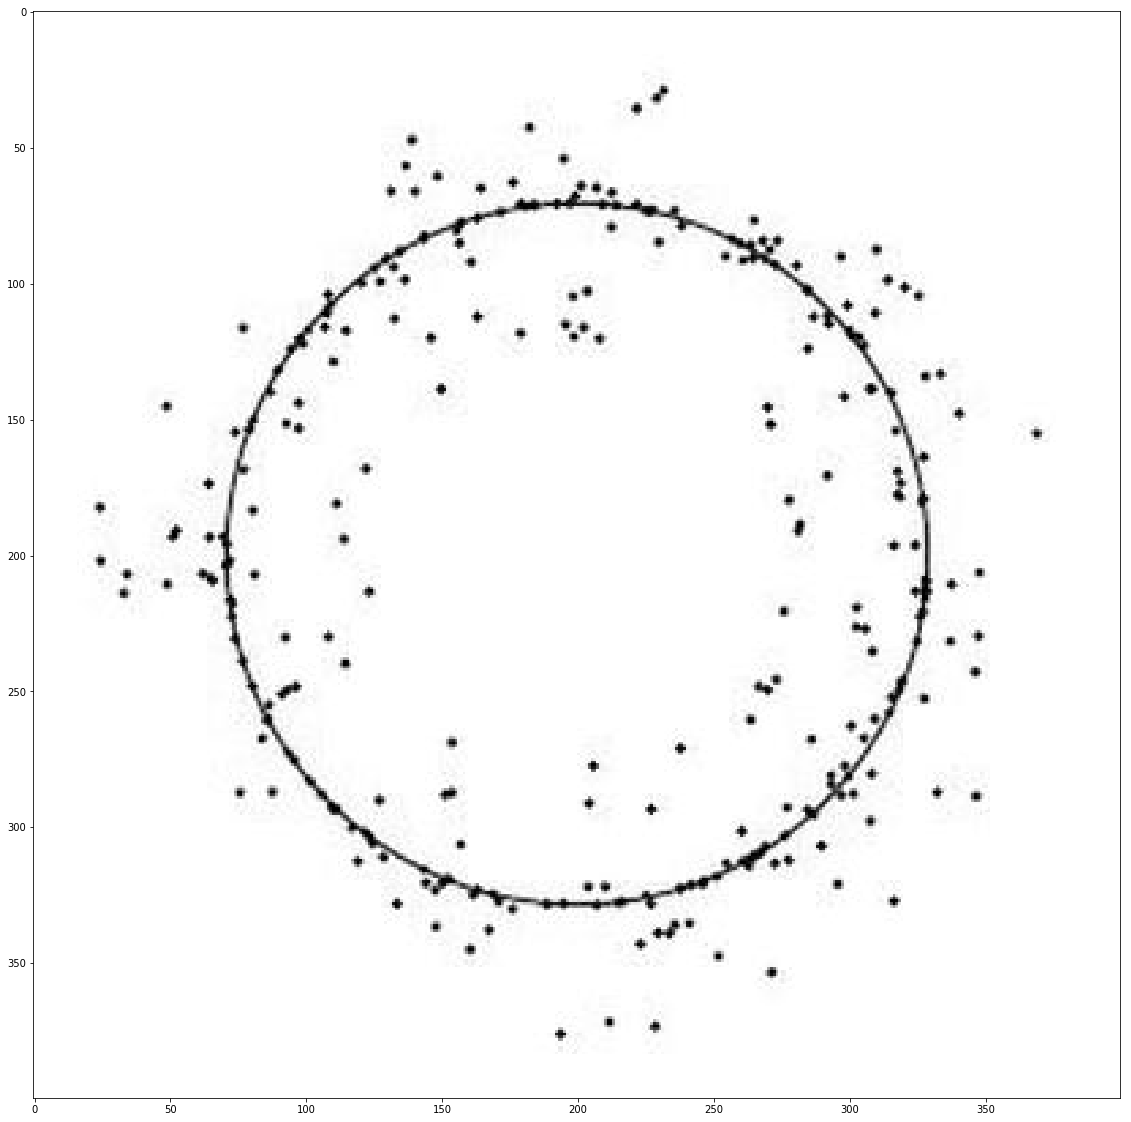

In [901]:
cimg = img
#img = cv2.medianBlur(img,5)
img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# Specify different radii
radii = np.arange(10,250,10)

# For each pair of radii...
for idx in range(len(radii)-1):
    # Get the minimum and maximum radius
    # Note you need to add 1 to each minimum
    # as the maximum of the previous pair covers this new minimum
    minRadius = radii[idx]+1
    maxRadius = radii[idx+1]

    # Hough Transform - Change here
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                               param1=500,param2=140,minRadius=minRadius,maxRadius=maxRadius)

    # Skip if no circles are detected - Change here
    if circles is None:
        continue

    circles = np.uint16(np.around(circles))

    # Go over circles, eliminating the ones that are not cocentric enough
    #height, width = img.shape
    #center = (width/2,height/2)
    for i in circles[0,:]:
        print(i)
        # draw the outer circle
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0), 2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255), 3)

fig = plt.figure(figsize = (20,20))
start_time = time.time()
plt.imshow(cimg, cmap = 'gray')
#plt.show()
end_time = time.time()
time_taken = end_time-start_time
print('Time taken for execution',time_taken)
'''
cv2.imshow('detected circles', cimg)
cv2.waitKey(0)

cv2.destroyAllWindows()
'''

In [899]:
#### Modification 3

In [678]:
import math

In [683]:
img = Image.open('C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good/3.png')
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg',0)

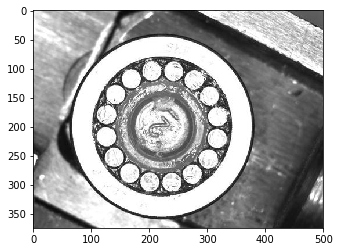

In [684]:
#img = cv2.imread('circles1.png',0)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# Specify different radii
radii = np.arange(5,310,25)

# For each pair of radii...
for idx in range(len(radii)-1):
    # Get the minimum and maximum radius
    # Note you need to add 1 to each minimum
    # as the maximum of the previous pair covers this new minimum
    minRadius = radii[idx]+1
    maxRadius = radii[idx+1]

    # Hough Transform - Change here
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5,
                               param1=25,param2=75,minRadius=minRadius,maxRadius=maxRadius)

    # Skip if no circles are detected - Change here
    if circles is None:
        continue

    circles = np.uint16(np.around(circles))

    # Go over circles, eliminating the ones that are not cocentric enough
    #height, width = img.shape
    #center = (width/2,height/2)
    for i in circles[0,:]:
        # draw the outer circle
        if math.sqrt((center[0]-i[0])**2 + (center[1]-i[1])**2) < 15:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
            # draw the center of the circle
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [497]:
#### Modification 4

In [499]:
img = Image.open('C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good/1.png')
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg',0)

In [502]:
  
from __future__ import division
import cv2
import numpy as np
import random
import math
import time


#original_image = cv2.imread('Sample_Input.jpg',1)
original_image = img
#cv2.imshow('Gray Image',original_image)

#Gaussian Blurring of Gray Image
blur_image = cv2.GaussianBlur(original_image,(3,3),0)
#cv2.imshow('Gaussian Blurred Image',blur_image)

#Using OpenCV Canny Edge detector to detect edges
edged_image_one = cv2.Canny(original_image,75,150)
edged_image_two = cv2.Canny(original_image,75,150)
#cv2.imshow('Edged Image One', edged_image_one)

height,width = edged_image_two.shape
print(height,width)
#finding contours from a image
contours, hierarchy = cv2.findContours(edged_image_one,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

V = np.zeros((height,width))
V_list = []     #list used to update set of pixels after each 4 pixel iteration
listV = []      #list to remove all points of true circle from V
f=0     #failure counter
Tf=10    #number of failures
Tmin=60     #minumum number of pixels left in V
Ta=3       #minimum distance between 2 pixels in V
Td=1        #distance threshold for 4th pizel
Tr=60/100   #ratio pixel

edge_pixels = np.where(edged_image_two == 255)
for i in xrange(0,len(edge_pixels[0])):
    x=edge_pixels[0][i]
    y=edge_pixels[1][i]
    V[x][y]=1


def main():
    for i in xrange(0,len(contours)):
        f=0
        circle_detected=0
        if(len(contours[i])>100):
            while (f<=Tf):
                f+=1
                random_pixels=random.sample(contours[i],4)
                x1 = random_pixels[0][0][1]
                y1 = random_pixels[0][0][0]
                x2 = random_pixels[1][0][1]
                y2 = random_pixels[1][0][0]
                x3 = random_pixels[2][0][1]
                y3 = random_pixels[2][0][0]
                x4 = random_pixels[3][0][1]
                y4 = random_pixels[3][0][0]
                
                V[x1][y1] = 0
                V[x2][y2] = 0
                V[x3][y3] = 0
                V[x4][y4] = 0
            
                colinearity = np.absolute(((x2-x1)*(y3-y1))-((x3-x1)*(y2-y1)))
                pixel_dist = check_pixel_distance(x1,y1,x2,y2,x3,y3)

                if(pixel_dist==1 and colinearity!=0):
                    circle_detected=determine_possible_circle(x1,y1,x2,y2,x3,y3,x4,y4,colinearity)
                if(circle_detected==1):
                    break  
               
            
            
           

#function to determine possible circle
def determine_possible_circle(x1,y1,x2,y2,x3,y3,x4,y4,colinearity):
    var1 = x2**2+y2**2 - (x1**2+y1**2)
    var2 = x3**2+y3**2 - (x1**2+y1**2)
    X_center = int(((var1*2*(y3-y1)) - (var2*2*(y2-y1)))/(4*colinearity))
    Y_center = int(((var2*2*(x2-x1)) - (var1*2*(x3-x1)))/(4*colinearity))
    #print X_center,Y_center
    if(X_center>0 and Y_center>0 and X_center<height and Y_center<width):
        radius = int(math.sqrt((x1-X_center)**2 + (y1-Y_center)**2))
        if(radius<70 and radius>20):
            #print radius
            d4 = int(math.sqrt((x4-X_center)**2 + (y4-Y_center)**2))-radius
            if(d4<=Td):
                cv2.circle(original_image,(Y_center,X_center),radius,(255,0,0),2)
                return 1
            else:
                return 0
           
            
            
#function to determine if points are closer than min threshold Ta
def check_pixel_distance(x1,y1,x2,y2,x3,y3):
    d1 = math.sqrt(((x2-x1)**2)+((y2-y1)**2))
    d2 = math.sqrt(((x3-x2)**2)+((y3-y2)**2))
    d3 = math.sqrt(((x3-x1)**2)+((y3-y1)**2))

    if(d1>Ta and d2>Ta and d3>Ta):
        return 1
    else:
        return 0            
            



start_time = time.time()
main()
plt.imshow(original_image)
#cv2.imshow('Detected Circle',original_image)
end_time = time.time()
time_taken = end_time-start_time
print('Time taken for execution',time_taken)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

375 500


ValueError: too many values to unpack (expected 2)